<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddy/blob/main/notebooks/PAR_Buddy_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Machine Learning to Calibrate PAR Buddy

__Please send feedback to happyday.github@gmail.com__

- [More detail on the PAR Buddy Project](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md)

- [Similar exploration using Multiple Linear Regression](https://github.com/solarslurpi/GrowBuddy/blob/main/notebooks/PAR_Buddy_mlr.ipynb)

# License

##### Copyright 2022 Margaret Johnson.


MIT License

Copyright (c) 2022 Margaret Johnson

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# Hello and Welcome!

[More detail on the PAR Buddy Project](https://github.com/solarslurpi/GrowBuddy/blob/main/pages/PAR_Buddy.md)

The [Multiple Linear Regression notebook](https://github.com/solarslurpi/GrowBuddy/blob/main/notebooks/PAR_Buddy_mlr.ipynb) showed us the AS7341 can be used as a PAR meter for indoor LED level adjustment.  It is by no means as accurate as a meter like the Apogee mq-500.  However, it is "good enough" for an indoor grower like me who uses a PAR meter mostly to adjust the height of the LEDs from a canopy of leaves.

In this notebook, I use the same data (specifically the readings_white samples) to explore a regression analysis using machine learning.

My interest is in exploring the technique.  My interest is not exploring the different results for the three different LED systems.  For this reason, I will only be using the readings_white samples.


#  Conclusions

| Method | RMSE | r2|
|------|-----|----|
| MLR | 16.9 | 0.996 |
| ML | 125.5 | 0.951 |

- "burple_red" samples were not used.  I decided not to include them because the visible spectrum channels recorded by the AS7341 is focused more on blue - orange then on spectrum in the red light.
- Multiple Linear Regression performed slightly better than machine learning.  Certainly, the machine learning model could be improved since the model I used lacks understanding of what the heck a good model is.
- Running this notebook several times pointed to a variability in the RMSE between 60 and 140.  I assume this is due to the random picking of training and testing samples.  I believe testing with more data should decrease this variability.



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load readings_white Samples

In [2]:
# Load readings from "white" LEDs
readings_white1 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02052022.csv')
readings_white2 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02092022.csv')
readings_white3 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/white_02142022.csv')
readings_burple1 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/burple_02072022.csv')
readings_burple2 = pd.read_csv('https://raw.githubusercontent.com/solarslurpi/GrowBuddy/main/data/burple_02112022.csv')
readings = pd.concat([readings_white1,readings_white2,readings_white3,readings_burple1,readings_burple2],sort=False,ignore_index=True)
readings.head()

,PPFD,415,445,480,515,555,590,630,680
0,40,60,282,274,438,659,859,953,465
1,59,86,404,387,624,939,1219,1357,663
2,88,127,599,563,919,1384,1791,1998,977
3,117,170,803,743,1225,1847,2383,2662,1304
4,144,209,984,902,1495,2254,2901,3240,1591


In [3]:
readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PPFD    117 non-null    int64
 1   415     117 non-null    int64
 2   445     117 non-null    int64
 3   480     117 non-null    int64
 4   515     117 non-null    int64
 5   555     117 non-null    int64
 6   590     117 non-null    int64
 7   630     117 non-null    int64
 8   680     117 non-null    int64
dtypes: int64(9)
memory usage: 8.4 KB


# Visualize

Please see the visualization of readings_white and the other samples in the [MLR notebook](https://github.com/solarslurpi/GrowBuddy/blob/main/notebooks/PAR_Buddy_mlr.ipynb)

# CREATE TESTING AND TRAINING DATASET (80% Train / 20% Test)

In [4]:
y = readings['PPFD']
x = readings.iloc[:,1:]
print(f'shape of x: {x.shape} shape of y: {y.shape}')

shape of x: (117, 8) shape of y: (117,)


# NORMALIZE THE DATA

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
y = y.values.reshape(-1,1)
y_scaled = scaler.fit_transform(y)

# SPLIT DATA INTO TRAIN AND TEST

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_scaled,test_size=0.2)

In [7]:
print(f"There are {len(x_train)+len(x_test)} total samples. {len(x_train)} samples are in the training set and {len(x_test)} samples are in the test set.")

There are 117 total samples. 93 samples are in the training set and 24 samples are in the test set.


# TRAIN MODEL

In [8]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50,input_dim=8, activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,651
Trainable params: 5,651
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [10]:
epochs_hist = model.fit(x_train,y_train,epochs=100,batch_size=50,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 2s 435ms/step - loss: 0.0692 - val_loss: 0.0383
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 0.0331 - val_loss: 0.0152
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0131 - val_loss: 0.0057
Epoch 4/100
2/2 [==============================] - 0s 62ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 5/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0054 - val_loss: 0.0089
Epoch 6/100
2/2 [==============================] - 0s 105ms/step - loss: 0.0087 - val_loss: 0.0103
Epoch 7/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 8/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0079 - val_loss: 0.0060
Epoch 9/100
2/2 [==============================] - 0s 45ms/step - loss: 0.0050 - val_loss: 0.0036
Epoch 10/100
2/2 [==============================] - 0s 58ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 11/100
2/2 

# EVALUATE MODEL

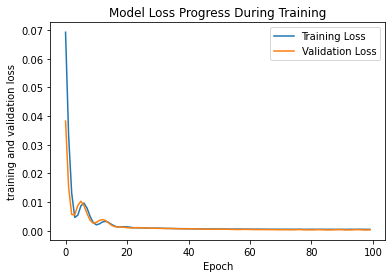

In [11]:
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('training and validation loss')
plt.legend(['Training Loss','Validation Loss'])

In [12]:
y_predict = model.predict(x_test)

In [13]:
x_test_orig = scaler.inverse_transform(x_test)
y_test_orig = scaler.inverse_transform(y_test)
y_predict_orig = scaler.inverse_transform(y_predict)

Text(0, 0.5, 'True Values')

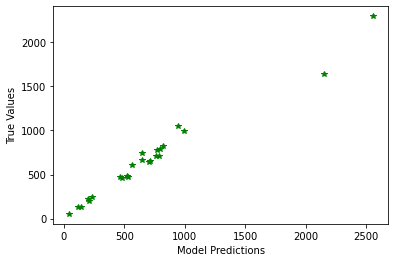

In [14]:
plt.plot(y_test_orig,y_predict_orig,'*',color='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [15]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
# r2 is the percentage of dependent variable variation that the (linear) model explains. 0% means there is
# no relationship. 100% means a perfect relationship.
y_test_orig 
r2 = r2_score(y_test_orig,y_predict_orig)
# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
# It tells you how concentrated the data is around the line of best fit.
# RMSE units is the same as PPFD units, so they are easy to interpret.
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'.3F'))

print('RMSE = ',RMSE,'\nr2 = ',r2)

RMSE =  125.464 
r2 =  0.9510313975927182
